In [ ]:
!pip install tensorflow_datasets==4.9.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 35.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.5 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21501 sha256=a66b75b679cb70d7f60a9bf50504e0da21e7aff7f6af506972a0824e1766e573
  Stored in directory: /root/.cache/pip/wheels/e1/e8/83/ddea66100678d139b14bc87692ece57c6a2a937956d2532608
Successfully built promise
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Not uninstalling protobuf at

### Testing

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

# Dataset "malaria" download
(train_data, test_data), info = tfds.load(
    "malaria",
    split=["train[:10%]", "train[90%:]"],
    as_supervised=True,
    with_info=True
)

# Normalization
def preprocess_images(image, label):
    image = tf.image.resize(image, (128, 128))  # adjust the size if needed
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Create tf.data.Dataset
train_dataset = train_data.map(preprocess_images)
test_dataset = test_data.map(preprocess_images)

# Batch the datasets
batch_size = 32
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training
model.fit(train_dataset, epochs=1)

# Evaluation
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print("\nTest accuracy: ", test_acc)

87/87 [==============================] - 35s 395ms/step - loss: 0.7430 - accuracy: 0.5385
87/87 - 12s - loss: 0.6578 - accuracy: 0.6056 - 12s/epoch - 139ms/step

Test accuracy:  0.6055877804756165


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

# Dataset "malaria" download
(train_data, test_data), info = tfds.load(
    "malaria",
    split=["train[:10%]", "train[90%:]"],
    as_supervised=True,
    with_info=True
)

# Normalization
def preprocess_images(image, label):
    image = tf.image.resize(image, (128, 128))  # adjust the size if needed
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Create tf.data.Dataset
train_dataset = train_data.map(preprocess_images)
test_dataset = test_data.map(preprocess_images)

# Batch the datasets
batch_size = 32
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training
model.fit(train_dataset, epochs=1)

# Evaluation
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print("\nTest accuracy: ", test_acc)

87/87 [==============================] - 94s 1s/step - loss: 0.6877 - accuracy: 0.5856
87/87 - 27s - loss: 0.6251 - accuracy: 0.6705 - 27s/epoch - 313ms/step

Test accuracy:  0.670536994934082


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

# Dataset "malaria" download
(train_data, test_data), info = tfds.load(
    "malaria",
    split=["train[:10%]", "train[90%:]"],
    as_supervised=True,
    with_info=True
)

# Normalization
def preprocess_images(image, label):
    image = tf.image.resize(image, (128, 128))  # adjust the size if needed
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Create tf.data.Dataset
train_dataset = train_data.map(preprocess_images)
test_dataset = test_data.map(preprocess_images)

# Batch the datasets
batch_size = 32
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training
model.fit(train_dataset, epochs=1)

# Evaluation
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print("\nTest accuracy: ", test_acc)

87/87 [==============================] - 276s 3s/step - loss: 0.6968 - accuracy: 0.4982
87/87 - 70s - loss: 0.6930 - accuracy: 0.5025 - 70s/epoch - 806ms/step

Test accuracy:  0.5025399327278137


### Default

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

# Dataset "malaria" download
(train_data, test_data), info = tfds.load(
    "malaria",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True,
    with_info=True
)

# Normalization
def preprocess_images(image, label):
    image = tf.image.resize(image, (128, 128))  # adjust the size if needed
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Create tf.data.Dataset
train_dataset = train_data.map(preprocess_images)
test_dataset = test_data.map(preprocess_images)

# Batch the datasets
batch_size = 32
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training
model.fit(train_dataset, epochs=5)

# Evaluation
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print("\nTest accuracy: ", test_acc)


Dl Size...: 100%|██████████| 337/337 [11:43<00:00, 30.72 MiB/s]

Dl Size...: 100%|██████████| 337/337 [11:43<00:00, 30.72 MiB/s]

Dl Size...: 100%|██████████| 337/337 [11:43<00:00, 30.72 MiB/s]

Dl Size...: 100%|██████████| 337/337 [11:43<00:00, 30.72 MiB/s]

Dl Size...: 100%|██████████| 337/337 [11:43<00:00, 30.72 MiB/s]

Dl Size...: 100%|██████████| 337/337 [11:43<00:00, 30.72 MiB/s]

Dl Size...: 100%|██████████| 337/337 [11:43<00:00, 30.72 MiB/s]

Extraction completed...:  97%|█████████▋| 26722/27560 [11:43<00:09, 87.73 file/s]

Dl Size...: 100%|██████████| 337/337 [11:43<00:00, 30.72 MiB/s]

Dl Size...: 100%|██████████| 337/337 [11:43<00:00, 30.72 MiB/s]

Dl Size...: 100%|██████████| 337/337 [11:43<00:00, 30.72 MiB/s]

Dl Size...: 100%|██████████| 337/337 [11:43<00:00, 30.72 MiB/s]

Dl Size...: 100%|██████████| 337/337 [11:43<00:00, 30.72 MiB/s]

Dl Size...: 100%|██████████| 337/337 [11:43<00:00, 30.72 MiB/s]

Dl Size...: 100%|██████████| 337/337 [11:43<00:00, 30.72 MiB/s]

Dl Siz

### Confusion Matrix s výchozí prahovou hodnotou

### Confusion Matrix s upravenou prahovou hodnotou

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions on the evaluation set
predictions = model.predict(test_dataset)



predicted_labels = np.round(predictions)

# True labels
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix with labels
print("\nPositive = Uninfected")
print("Negative = Parasitized")
print("\nTreshold = 0.5")
print("\nConfusion Matrix:")
print("                  Predicted Negative        Predicted Positive")
print(f"Actual Negative    TN: {conf_matrix[0, 0]}                     FP: {conf_matrix[0, 1]}")
print(f"Actual Positive    FN: {conf_matrix[1, 0]}                     TP: {conf_matrix[1, 1]}")

tn, fp, fn, tp = conf_matrix.ravel()

pacc = (tp)/(tp+fn)
print("\nPositive accuracy: ",pacc)
nacc = (tn)/(tn+fp)
print("Negative accuracy: ",nacc)
acc = (tp+tn)/(tp+tn+fp+fn)
print("\nTotal accuracy: ",acc)

fpr = fp / (fp+tn)
print("\nFalse Positive Rate (FPR):", fpr)
fnr = fn / (fn+tp)
print("False Negative Rate (FNR):", fnr)

# Calculate precision, recall, and F1 score
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1 score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Classification report
class_report = classification_report(true_labels, predicted_labels)
print("\nClassification Report:")
print(class_report)

173/173 [==============================] - 55s 320ms/step

Positive = Uninfected
Negative = Parasitized

Treshold = 0.5

Confusion Matrix:
                  Predicted Negative        Predicted Positive
Actual Negative    TN: 2623                     FP: 157
Actual Positive    FN: 95                     TP: 2637

Positive accuracy:  0.9652269399707174
Negative accuracy:  0.9435251798561151

Total accuracy:  0.9542815674891146

False Positive Rate (FPR): 0.05647482014388489
False Negative Rate (FNR): 0.03477306002928258

Precision: 0.9438081603435934
Recall: 0.9652269399707174
F1 Score: 0.9543973941368078

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      2780
           1       0.94      0.97      0.95      2732

    accuracy                           0.95      5512
   macro avg       0.95      0.95      0.95      5512
weighted avg       0.95      0.95      0.95      5512



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions on the test set
predictions = model.predict(test_dataset)

# Adjust the decision threshold (e.g., set it to 0.3)
adjusted_threshold = 0.78
adjusted_predicted_labels = (predictions > adjusted_threshold).astype(int)

# True labels
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, adjusted_predicted_labels)

# Print confusion matrix with labels
print("\nPositive = Uninfected")
print("Negative = Parasitized")
print("\nTreshold = ",adjusted_threshold)
print("\nConfusion Matrix:")
print("                  Predicted Negative        Predicted Positive")
print(f"Actual Negative    TN: {conf_matrix[0, 0]}                     FP: {conf_matrix[0, 1]}")
print(f"Actual Positive    FN: {conf_matrix[1, 0]}                     TP: {conf_matrix[1, 1]}")

tn, fp, fn, tp = conf_matrix.ravel()

pacc = (tp)/(tp+fn)
print("\nPositive accuracy: ",pacc)
nacc = (tn)/(tn+fp)
print("Negative accuracy: ",nacc)
acc = (tp+tn)/(tp+tn+fp+fn)
print("\nTotal accuracy: ",acc)

fpr = fp / (fp+tn)
print("\nFalse Positive Rate (FPR):", fpr)
fnr = fn / (fn+tp)
print("False Negative Rate (FNR):", fnr)

# Calculate precision, recall, and F1 score based on the adjusted predictions
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1 score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Classification report
class_report = classification_report(true_labels, adjusted_predicted_labels)
print("\nClassification Report:")
print(class_report)

173/173 [==============================] - 55s 319ms/step

Positive = Uninfected
Negative = Parasitized

Treshold =  0.78

Confusion Matrix:
                  Predicted Negative        Predicted Positive
Actual Negative    TN: 2688                     FP: 92
Actual Positive    FN: 192                     TP: 2540

Positive accuracy:  0.9297218155197657
Negative accuracy:  0.9669064748201439

Total accuracy:  0.9484760522496372

False Positive Rate (FPR): 0.033093525179856115
False Negative Rate (FNR): 0.07027818448023426

Precision: 0.9650455927051672
Recall: 0.9297218155197657
F1 Score: 0.947054436987323

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2780
           1       0.97      0.93      0.95      2732

    accuracy                           0.95      5512
   macro avg       0.95      0.95      0.95      5512
weighted avg       0.95      0.95      0.95      5512



### Vizualizace s výchozí prahovou hodnotou:

### Vizualizace s upravenou prahovou hodnotou:

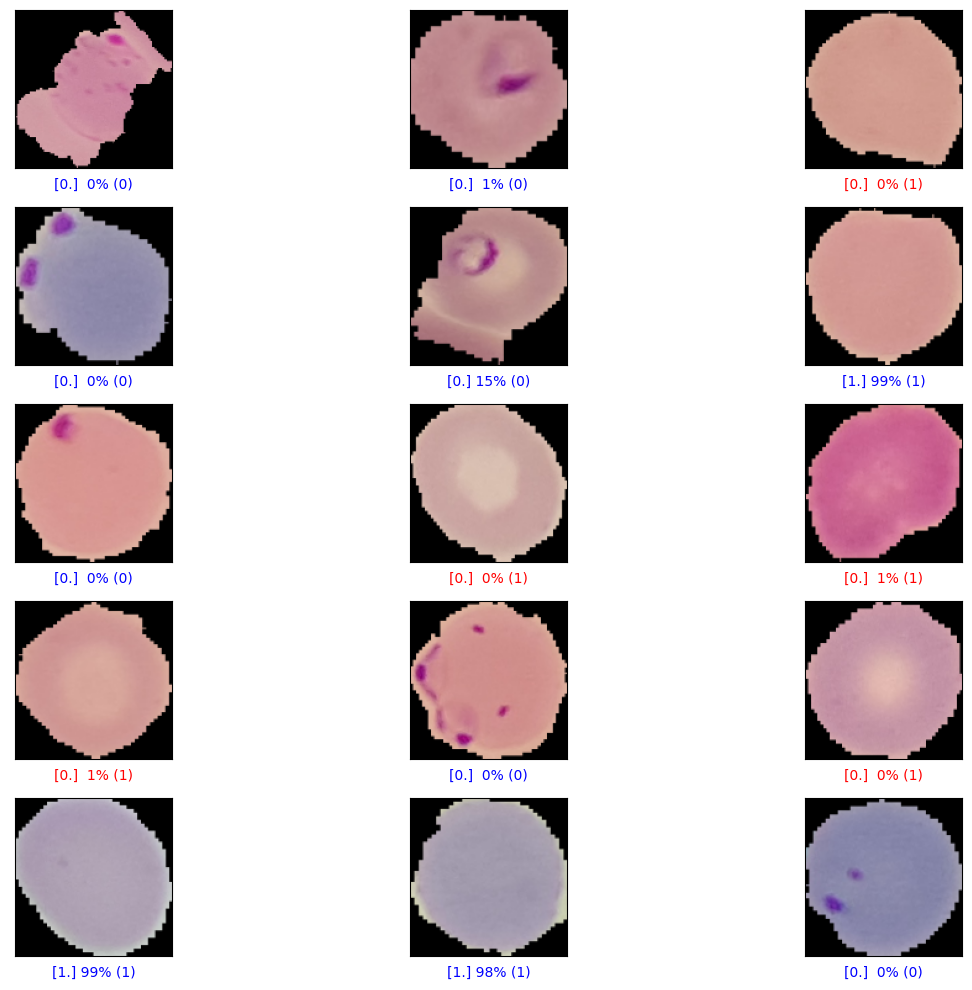

In [ ]:
import matplotlib.pyplot as plt
# Vizualization

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Convert normalized image back to uint8
    img = (img.numpy() * 255).astype('uint8')

    plt.imshow(img)  


    predicted_label = np.round(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                          100*np.max(predictions_array),
                                          true_label),
                                          color=color)

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i, (image, label) in enumerate(test_dataset.take(num_images)):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], label.numpy(), image)
plt.tight_layout()
plt.show()

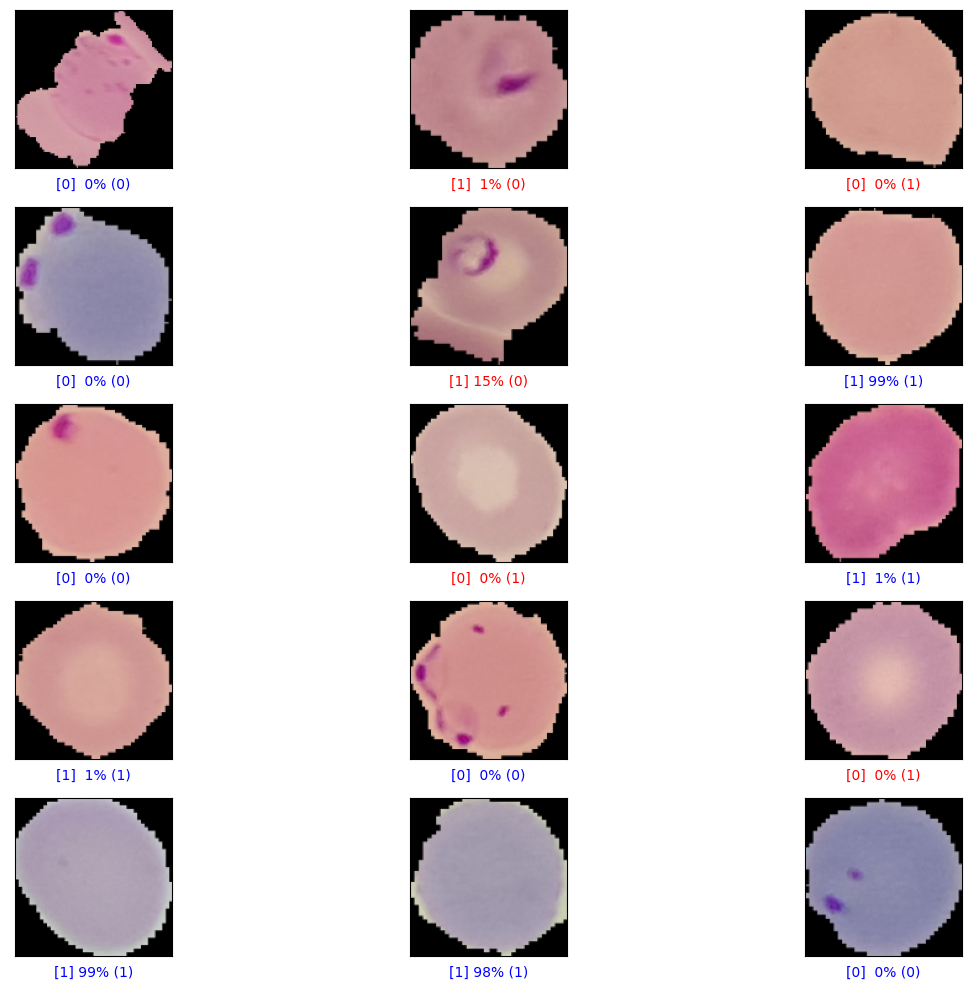

In [ ]:
import matplotlib.pyplot as plt
# Vizualization

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Convert normalized image back to uint8
    img = (img.numpy() * 255).astype('uint8')

    plt.imshow(img)  

    adjusted_threshold = 0.001
    adjusted_predicted_label = (predictions_array > adjusted_threshold).astype(int)
    if adjusted_predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(adjusted_predicted_label,
                                          100*np.max(predictions_array),
                                          true_label),
                                          color=color)

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i, (image, label) in enumerate(test_dataset.take(num_images)):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], label.numpy(), image)
plt.tight_layout()
plt.show()

### ROC křivka

173/173 [==============================] - 55s 320ms/step


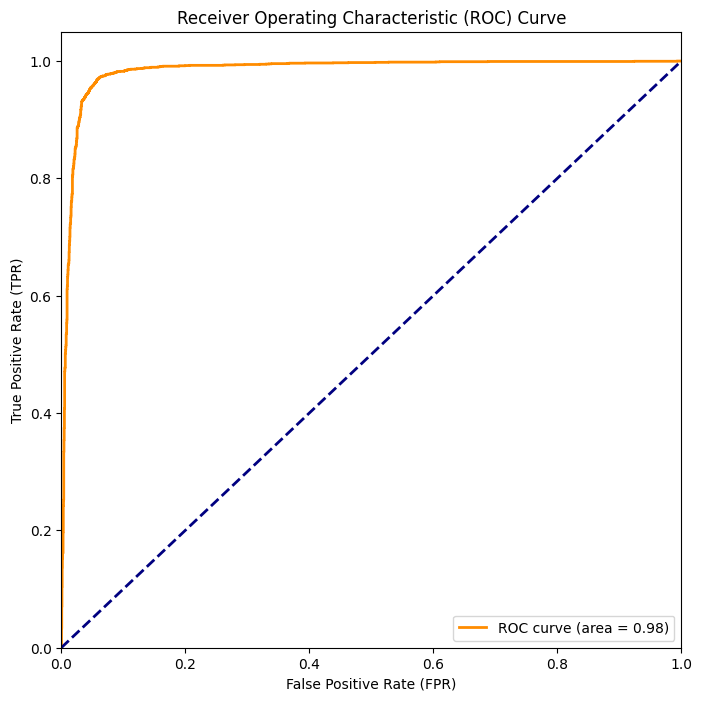

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from tensorflow import keras

# Calculate False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(true_labels, predictions)

# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
!pip install binclass-tools


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


### Interaktivní Confusion Matrix s cenami

In [ ]:
import bctools as bc
threshold_step = 0.01
optimize_threshold = 'all'
currency = '$'

train_cost_dict = bc.get_cost_dict(TN = 0, FP = 10, FN = 2, TP = 0)
bc.confusion_matrix_plot

cf_fig, var_metrics_df, invar_metrics_df, opt_thresh_df = bc.confusion_matrix_plot(
    true_y = true_labels, 
    predicted_proba = predictions, 
    threshold_step = threshold_step, 
   # amounts = amounts, 
    cost_dict = train_cost_dict, 
    #N_subsets = 70, subsets_size = 0.2, # default
    #with_replacement = False,           # default
    currency = currency,
    title = 'Interactive Confusion Matrix with costs')
cf_fig


### Vizualizace modelu

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 128)     

In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.3/993.3 kB 46.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


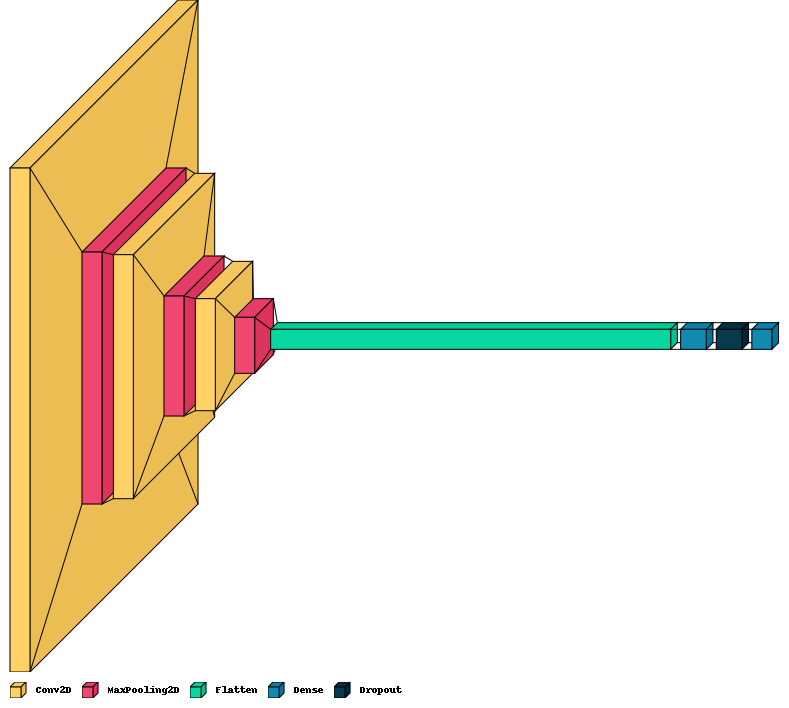

In [ ]:
import visualkeras

visualkeras.layered_view(model,legend=True).show() # display using your system viewer

In [ ]:
!pip install keras-visualizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 13.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
from keras_visualizer import visualizer

visualizer(model, file_format='png')

<img src="/graph.png" width="" align="" />

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ee7b886e-a560-42bc-aec6-936cccf719db' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>